In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from metrics.internal_metrics import compute_all_metrics

In [9]:
data = pd.read_csv('../dataset/Dortmund_features_preprocessed.csv', index_col=0)
features = data.values
subject_ids = data.index.values

print(f"Data shape: {features.shape}")
print(f"Number of subjects: {len(subject_ids)}")
print(f"Number of features: {features.shape[1]}")

Data shape: (600, 100)
Number of subjects: 600
Number of features: 100


Testing Agglomerative Clustering with different k values...
k=2: Silhouette=0.1083, Davies-Bouldin=2.6805, Calinski-Harabasz=78.25
k=3: Silhouette=0.1128, Davies-Bouldin=2.3544, Calinski-Harabasz=61.60
k=4: Silhouette=0.0624, Davies-Bouldin=3.1790, Calinski-Harabasz=49.70
k=5: Silhouette=0.0466, Davies-Bouldin=3.0934, Calinski-Harabasz=43.88
k=6: Silhouette=0.0438, Davies-Bouldin=2.8817, Calinski-Harabasz=39.37


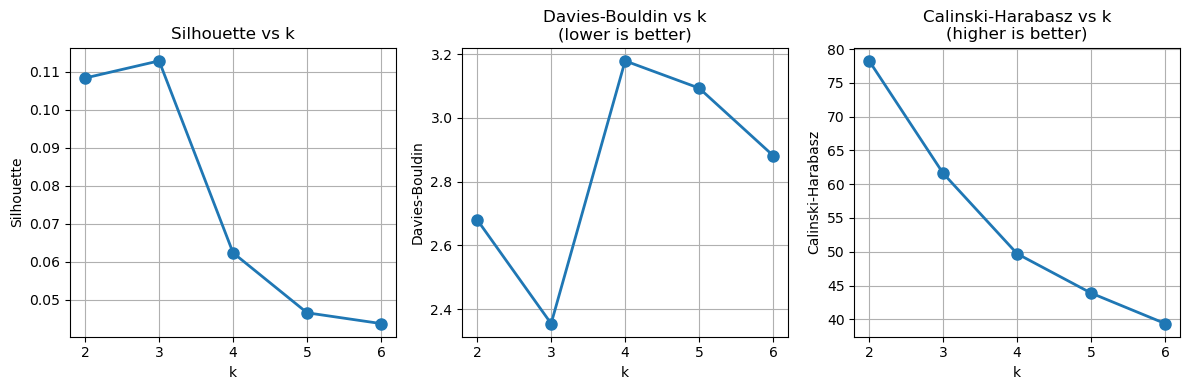

In [10]:
k_values = [2, 3, 4, 5, 6]
results_k = {}

# Option A: euclidean + ward -> tends to create comapct roundish clusters
print("Testing Agglomerative Clustering with different k values...")
for k in k_values:
    clustering = AgglomerativeClustering(
        n_clusters=k,
        metric='euclidean',   # for sklearn >=1.2 use metric='euclidean'
        linkage='ward'
    )
    
    labels = clustering.fit_predict(features)
    
    metrics_k = compute_all_metrics(features, labels, include_dunn=False)
    
    results_k[k] = {
        'labels': labels,
        'metrics': metrics_k
    }
    
    print(f"k={k}: "
          f"Silhouette={metrics_k['silhouette_score']:.4f}, "
          f"Davies-Bouldin={metrics_k['davies_bouldin_score']:.4f}, "
          f"Calinski-Harabasz={metrics_k['calinski_harabasz_score']:.2f}")

# ---- PLOTS (same style as for k-means/GMM) ----
plt.figure(figsize=(12, 4))

# 1) Silhouette
plt.subplot(1, 3, 1)
silhouettes = [results_k[k]['metrics']['silhouette_score'] for k in k_values]
plt.plot(k_values, silhouettes, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k')
plt.grid(True)
plt.xticks(k_values)

# 2) Davies-Bouldin
plt.subplot(1, 3, 2)
db_scores = [results_k[k]['metrics']['davies_bouldin_score'] for k in k_values]
plt.plot(k_values, db_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Davies-Bouldin')
plt.title('Davies-Bouldin vs k\n(lower is better)')
plt.grid(True)
plt.xticks(k_values)

# 3) Calinski-Harabasz
plt.subplot(1, 3, 3)
ch_scores = [results_k[k]['metrics']['calinski_harabasz_score'] for k in k_values]
plt.plot(k_values, ch_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz')
plt.title('Calinski-Harabasz vs k\n(higher is better)')
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()

Testing Agglomerative Clustering with different k values...
k=2: Silhouette=0.1108, Davies-Bouldin=2.5404, Calinski-Harabasz=81.35
k=3: Silhouette=0.1118, Davies-Bouldin=2.6972, Calinski-Harabasz=64.23
k=4: Silhouette=0.0274, Davies-Bouldin=2.6646, Calinski-Harabasz=47.18
k=5: Silhouette=0.0302, Davies-Bouldin=2.5434, Calinski-Harabasz=40.41
k=6: Silhouette=0.0337, Davies-Bouldin=2.4996, Calinski-Harabasz=34.64


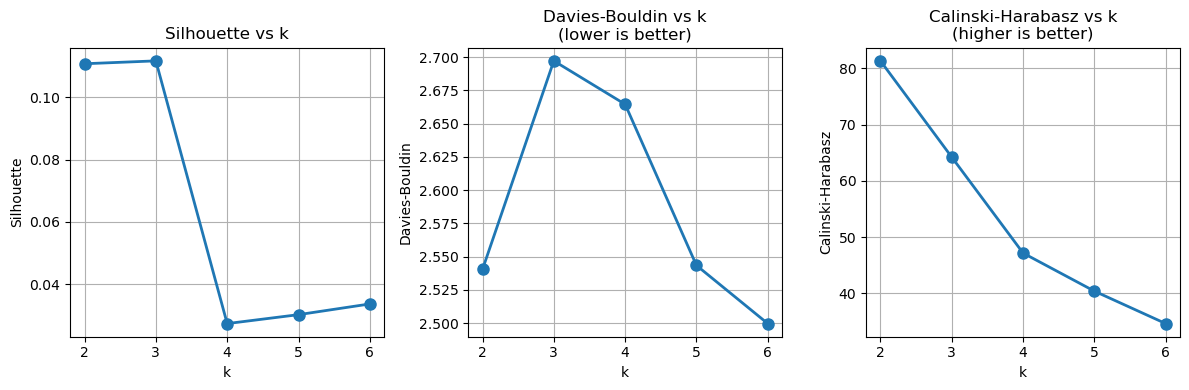

In [11]:
k_values = [2, 3, 4, 5, 6]
results_k = {}

# Option B: cosine + average
print("Testing Agglomerative Clustering with different k values...")
for k in k_values:
    clustering = AgglomerativeClustering(
    n_clusters=k,
    metric='cosine',   # or metric='cosine' in newer versions
    linkage='average'
    )

    labels = clustering.fit_predict(features)
    
    metrics_k = compute_all_metrics(features, labels, include_dunn=False)
    
    results_k[k] = {
        'labels': labels,
        'metrics': metrics_k
    }
    
    print(f"k={k}: "
          f"Silhouette={metrics_k['silhouette_score']:.4f}, "
          f"Davies-Bouldin={metrics_k['davies_bouldin_score']:.4f}, "
          f"Calinski-Harabasz={metrics_k['calinski_harabasz_score']:.2f}")

# ---- PLOTS (same style as for k-means/GMM) ----
plt.figure(figsize=(12, 4))

# 1) Silhouette
plt.subplot(1, 3, 1)
silhouettes = [results_k[k]['metrics']['silhouette_score'] for k in k_values]
plt.plot(k_values, silhouettes, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k')
plt.grid(True)
plt.xticks(k_values)

# 2) Davies-Bouldin
plt.subplot(1, 3, 2)
db_scores = [results_k[k]['metrics']['davies_bouldin_score'] for k in k_values]
plt.plot(k_values, db_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Davies-Bouldin')
plt.title('Davies-Bouldin vs k\n(lower is better)')
plt.grid(True)
plt.xticks(k_values)

# 3) Calinski-Harabasz
plt.subplot(1, 3, 3)
ch_scores = [results_k[k]['metrics']['calinski_harabasz_score'] for k in k_values]
plt.plot(k_values, ch_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz')
plt.title('Calinski-Harabasz vs k\n(higher is better)')
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()